# 2016 US Bike Share Activity Snapshot

## Table of Contents
- [Introduction](#intro)
- [Posing Questions](#pose_questions)
- [Data Collection and Wrangling](#wrangling)
  - [Condensing the Trip Data](#condensing)
- [Exploratory Data Analysis](#eda)
  - [Statistics](#statistics)
  - [Visualizations](#visualizations)
- [Performing Your Own Analysis](#eda_continued)
- [Conclusions](#conclusions)

<a id='intro'></a>
## Introduction

Over the past decade, bicycle-sharing systems have been growing in number and popularity in cities across the world. Bicycle-sharing systems allow users to rent bicycles for short trips, typically 30 minutes or less. Thanks to the rise in information technologies, it is easy for a user of the system to access a dock within the system to unlock or return bicycles. These technologies also provide a wealth of data that can be used to explore how these bike-sharing systems are used.

Perform an exploratory analysis on data provided by [Motivate](https://www.motivateco.com/), a bike-share system provider for many major cities in the United States. Compare the system usage between three large cities: New York City, Chicago, and Washington, DC. Find if there are any differences within each system for those users that are registered, regular users and those users that are short-term, casual users.

<a id='pose_questions'></a>
## Posing Questions

**Question 1**: Questions related to bike sharing that should be answered by data.

**Answer**: 
<ol>
<li>What kind of distance people can use biking in given particular city.
<li>How can we make better driving experience so that we retain existing customers and attract new.
<li>Analyse and find which location has more need for the service.
<li>Find out location of average commuters.
</ol>


<a id='wrangling'></a>
## Data Collection and Wrangling
 

In [2]:
## import all necessary packages and functions.
import csv # read and write csv files
from datetime import datetime # operations to parse dates
from pprint import pprint # use to print data structures like dictionaries in
                          # a nicer way than the base print function.
import pprint
import calendar 
import time #To use few function to manipulate time
import datetime #To use few function to handle date
import pandas as pd #To plot graph

In [3]:
def print_first_point(filename):
    """
    This function prints and returns the first data point (second row) from
    a csv file that includes a header row.
    """
    # print city name for reference
    city = filename.split('-')[0].split('/')[-1]
    print('\nCity: {}'.format(city))
    
    with open(filename, 'r') as f_in:
        
        trip_reader = csv.DictReader(f_in) #using DictReader to read csv files.
        
        ## first trip from the data file and store it in a variable.     ##
        first_trip = next(trip_reader) #using next will traverse through file.
        pprint.pprint(first_trip) #pprint function will print datadictionary
        
        
    # output city name and first trip for later testing
    return (city, first_trip)

# list of files for each city
data_files = ['./data/NYC-CitiBike-2016.csv',
              './data/Chicago-Divvy-2016.csv',
              './data/Washington-CapitalBikeshare-2016.csv',]

# print the first trip from each file, store in dictionary
example_trips = {}
for data_file in data_files:
    city, first_trip = print_first_point(data_file)
    example_trips[city] = first_trip


City: NYC
OrderedDict([('tripduration', '839'),
             ('starttime', '1/1/2016 00:09:55'),
             ('stoptime', '1/1/2016 00:23:54'),
             ('start station id', '532'),
             ('start station name', 'S 5 Pl & S 4 St'),
             ('start station latitude', '40.710451'),
             ('start station longitude', '-73.960876'),
             ('end station id', '401'),
             ('end station name', 'Allen St & Rivington St'),
             ('end station latitude', '40.72019576'),
             ('end station longitude', '-73.98997825'),
             ('bikeid', '17109'),
             ('usertype', 'Customer'),
             ('birth year', ''),
             ('gender', '0')])

City: Chicago
OrderedDict([('trip_id', '9080545'),
             ('starttime', '3/31/2016 23:30'),
             ('stoptime', '3/31/2016 23:46'),
             ('bikeid', '2295'),
             ('tripduration', '926'),
             ('from_station_id', '156'),
             ('from_station_name', 'Clar

<a id='condensing'></a>
### Condensing the Trip Data

Each city provides different information. Even where the information is the same, the column names and formats are sometimes different. To make things as simple as possible when we get to the actual exploration, we should trim and clean the data. Cleaning the data makes sure that the data formats across the cities are consistent, while trimming focuses only on the parts of the data we are most interested in to make the exploration easier to work with.

Generate new data files with five values of interest for each trip: trip duration, starting month, starting hour, day of the week, and user type. Each of these may require additional wrangling depending on the city:

- **Duration**: This has been given to us in seconds (New York, Chicago) or milliseconds (Washington). A more natural unit of analysis will be if all the trip durations are given in terms of minutes.
- **Month**, **Hour**, **Day of Week**: Ridership volume is likely to change based on the season, time of day, and whether it is a weekday or weekend. Use the start time of the trip to obtain these values. The New York City data includes the seconds in their timestamps, while Washington and Chicago do not. The [`datetime`](https://docs.python.org/3/library/datetime.html) package will be very useful here to make the needed conversions.
- **User Type**: It is possible that users who are subscribed to a bike-share system will have different patterns of use compared to users who only have temporary passes. Washington divides its users into two types: 'Registered' for users with annual, monthly, and other longer-term subscriptions, and 'Casual', for users with 24-hour, 3-day, and other short-term passes. The New York and Chicago data uses 'Subscriber' and 'Customer' for these groups, respectively. For consistency, you will convert the Washington labels to match the other two.


In [4]:
def duration_in_mins(datum, city):

    if city == "Washington":
        duration = float(datum['Duration (ms)'])/(60*1000) #finding duration in minutes for miliseconds
    else:
        duration = float(datum['tripduration'])/60 #finding duration in minutes for seconds
    return duration;


# Some tests to check that your code works. 
tests = {'NYC': 13.9833,
         'Chicago': 15.4333,
         'Washington': 7.1231}

for city in tests:
    assert abs(duration_in_mins(example_trips[city], city) - tests[city]) < .001

In [5]:
def time_of_trip(datum, city):

    """ 
    Notes on Implementaion:
    tstamp reads actual timestamp from data dictionary
    striptime helps to convert input string as timestamp
    once input is recognized as timestamp Hour, Month and Day_of_week variables extract relevant
    information from time and calendar functions.
    """
    
    # For each city read timestamp from csv file and find hour, month and weekday
    if city=="NYC":
        tstamp = datum['starttime']
        hour = datetime.datetime.strptime(tstamp, "%m/%d/%Y %H:%M:%S").hour
        month = datetime.datetime.strptime(tstamp, "%m/%d/%Y %H:%M:%S").month
        day_of_week = calendar.day_name[datetime.datetime.strptime(tstamp, "%m/%d/%Y %H:%M:%S").weekday()]
    elif city=="Chicago":
        tstamp = datum['starttime']
        hour = datetime.datetime.strptime(tstamp, "%m/%d/%Y %H:%M").hour
        month = datetime.datetime.strptime(tstamp, "%m/%d/%Y %H:%M").month
        day_of_week = calendar.day_name[datetime.datetime.strptime(tstamp, "%m/%d/%Y %H:%M").weekday()]            
    elif city=="Washington":
        tstamp = datum['Start date']
        hour = datetime.datetime.strptime(tstamp, "%m/%d/%Y %H:%M").hour
        month = datetime.datetime.strptime(tstamp, "%m/%d/%Y %H:%M").month
        day_of_week = calendar.day_name[datetime.datetime.strptime(tstamp, "%m/%d/%Y %H:%M").weekday()]                    
    return (month, hour, day_of_week)


# Some tests to check that your code works. 
tests = {'NYC': (1, 0, 'Friday'),
         'Chicago': (3, 23, 'Thursday'),
         'Washington': (3, 22, 'Thursday')}

for city in tests:
    assert time_of_trip(example_trips[city], city) == tests[city]

In [6]:
def type_of_user(datum, city):

    """ 
    Notes on Implementaion:
    Only for washington the member type is differenct hence checking Member type for washington if Registered
    user_type assigned as Subscriber for NYC and Chicago user_type is returned directly from data dictionary.
    """

    user_type="NotAssigned"
    if city=="Washington":
        MemType = datum["Member Type"]
        if MemType=="Registered":
            user_type = "Subscriber"
    else:
        user_type = datum["usertype"]
    
    return user_type


# Some tests to check that your code works. 
tests = {'NYC': 'Customer',
         'Chicago': 'Subscriber',
         'Washington': 'Subscriber'}

for city in tests:
    assert type_of_user(example_trips[city], city) == tests[city]

In [7]:
def condense_data(in_file, out_file, city):
    """
    This function takes full data from the specified input file
    and writes the condensed data to a specified output file. The city
    argument determines how the input file will be parsed.
    
    """
    
    with open(out_file, 'w') as f_out, open(in_file, 'r') as f_in:
        # set up csv DictWriter object - writer requires column names for the
        # first row as the "fieldnames" argument
        out_colnames = ['duration', 'month', 'hour', 'day_of_week', 'user_type']        
        trip_writer = csv.DictWriter(f_out, fieldnames = out_colnames)
        trip_writer.writeheader()
        
        trip_reader = csv.DictReader(f_in) #using DictReader to read csv files.
        #print(city)
        # collect data from and process each row
        for row in trip_reader:

            new_point = {}
            datum = row #using next will traverse through file.
            #pprint.pprint(first_trip) #pprint function will print datadictionary
            #print(city)

            duration = duration_in_mins(datum,city)
            timeoftrip = time_of_trip(datum, city)
            month = timeoftrip[0]
            hour = timeoftrip[1]
            day_of_week = timeoftrip[2]
            user_type = type_of_user(datum, city)
            new_point["duration"] = duration
            new_point["month"] = month
            new_point["hour"] = hour
            new_point["day_of_week"] = day_of_week
            new_point["user_type"] = user_type
            trip_writer.writerow(new_point)
            

In [8]:
city_info = {'Washington': {'in_file': './data/Washington-CapitalBikeshare-2016.csv',
                            'out_file': './data/Washington-2016-Summary.csv'},
             'Chicago': {'in_file': './data/Chicago-Divvy-2016.csv',
                         'out_file': './data/Chicago-2016-Summary.csv'},
             'NYC': {'in_file': './data/NYC-CitiBike-2016.csv',
                     'out_file': './data/NYC-2016-Summary.csv'}}

for city, filenames in city_info.items():
    condense_data(filenames['in_file'], filenames['out_file'], city)
    print_first_point(filenames['out_file'])


City: Washington
OrderedDict([('duration', '7.123116666666666'),
             ('month', '3'),
             ('hour', '22'),
             ('day_of_week', 'Thursday'),
             ('user_type', 'Subscriber')])

City: Chicago
OrderedDict([('duration', '15.433333333333334'),
             ('month', '3'),
             ('hour', '23'),
             ('day_of_week', 'Thursday'),
             ('user_type', 'Subscriber')])

City: NYC
OrderedDict([('duration', '13.983333333333333'),
             ('month', '1'),
             ('hour', '0'),
             ('day_of_week', 'Friday'),
             ('user_type', 'Customer')])




<a id='eda'></a>
## Exploratory Data Analysis
Which city has the highest number of trips? Which city has the highest proportion of trips made by subscribers? Which city has the highest proportion of trips made by short-term customers?

**Answer**: New York has scored highest number of trips for all three categories.

In [9]:
def number_of_trips(filename):
    """
    This function reads in a file with trip data and reports the number of
    trips made by subscribers, customers, and total overall.
    """
    with open(filename, 'r') as f_in:
        # set up csv reader object
        reader = csv.DictReader(f_in)
        
        # initialize count variables
        n_subscribers = 0
        n_customers = 0
        
        # tally up ride types
        for row in reader:
            if row['user_type'] == 'Subscriber':
                n_subscribers += 1
            else:
                n_customers += 1
        
        # compute total number of rides
        n_total = n_subscribers + n_customers
        
        # return tallies as a tuple
        return(n_subscribers, n_customers, n_total)

In [10]:

#initialize dictionary variable
city_info={}

#Add city names and datafiles to dictionary
city_info['Chicago']='./data/Chicago-2016-Summary.csv'
city_info['NYC']='./data/NYC-2016-Summary.csv'
city_info['Washington']='./data/Washington-2016-Summary.csv'

#Read data dictionary using for loop
for element in city_info.items():
    city=element[0]
    data_file=element[1]
    if city=='Chicago':
        nooftrips = number_of_trips(data_file) #Using number_of_trips function get totaltrips, Subscriber Trips and Customer trips
        TotalTripSub_C = nooftrips[0]
        TotalTripCust_C = nooftrips[1]
        TotalTripChicago = nooftrips[2]
        #print("Total Number of Trips in Chicago: ",TotalTripChicago)
    elif city=='NYC':
        nooftrips = number_of_trips(data_file)
        TotalTripSub_N = nooftrips[0]
        TotalTripCust_N = nooftrips[1]        
        TotalTripNYC = nooftrips[2]
        #print("Total Number of Trips in NYC: ",TotalTripNYC)
    elif city=='Washington':
        nooftrips = number_of_trips(data_file)
        TotalTripSub_W = nooftrips[0]
        TotalTripCust_W = nooftrips[1]
        TotalTripWtn = nooftrips[2]
        #print("Total Number of Trips in NYC: ",TotalTripWtn)

#Implementation to check which city has highest number of trips        
if (TotalTripChicago > TotalTripNYC) and (TotalTripChicago > TotalTripWtn):
    print("Chicago has the highest number of Trips. Recorded as: ",TotalTripChicago)
elif (TotalTripNYC > TotalTripChicago) and (TotalTripNYC > TotalTripWtn):
    print("New York has the highest number of Trips. Recorded as: ",TotalTripNYC)
else:
    print("Washington has the highest number of Trips. Recorded as: ",TotalTripWtn)
    
#implementation to find highest number of trips made by subscribers
if (TotalTripSub_C > TotalTripSub_N) and (TotalTripSub_C > TotalTripSub_W):
    print("Chicago Subscribers made the highest number of Trips. Recorded as: ",TotalTripSub_C)
elif (TotalTripSub_N > TotalTripSub_C) and (TotalTripSub_N > TotalTripSub_W):
    print("New York Subscribers made the highest number of Trips. Recorded as: ",TotalTripSub_N)
else:
    print("Washington Subscribers made the highest number of Trips. Recorded as: ",TotalTripSub_W)
    
#implementation to find highest number of trips made by short-term customers
if (TotalTripCust_C > TotalTripCust_N) and (TotalTripCust_C > TotalTripCust_W):
    print("For Short-time customers, Chicago has the highest number of Trips. Recorded as: ",TotalTripCust_C)
elif (TotalTripCust_N > TotalTripCust_C) and (TotalTripCust_N > TotalTripCust_W):
    print("For Short-time customers, New York has the highest number of Trips. Recorded as: ",TotalTripCust_N)
else:
    print("For Short-time customer, Washington has the highest number of Trips. Recorded as: ",TotalTripCust_W)

New York has the highest number of Trips. Recorded as:  276798
New York Subscribers made the highest number of Trips. Recorded as:  245896
For Short-time customers, New York has the highest number of Trips. Recorded as:  30902


Bike-share systems are designed for riders to take short trips. Most of the time, users are allowed to take trips of 30 minutes or less with no additional charges, with overage charges made for trips of longer than that duration. What is the average trip length for each city? What proportion of rides made in each city are longer than 30 minutes?

**Answer**: For Chicago city, the average trip length is 17 minutes and 8.33% of trips are longer than 30 minutes.
For NYC city, the average trip length is 16 minutes and 7.3% of trips are longer than 30 minutes.
For Washington city, the average trip length is 19 minutes and 10.84% of trips are longer than 30 minutes.

In [11]:
def Operations_In_Duration(city, filename):
    """
    This function reads in source data with any given city and calculates average duration and percentage of
    trips longer than 30 minutes
    """
    with open(filename, 'r') as f_in:
        # set up csv reader object
        reader = csv.DictReader(f_in)
        
        # initialize variables
        data_element = 0
        sumoftime=0
        avg=1
        element_count = 0
        ride_over_thirtymin = 0
        avg_over_thirtymin = 1
        avg_vs_thirtymin = "Not Defined"
        subscriber_duration = 0
        subscriber_count = 0
        nonsubscriber_duration = 0
        subscriber_vs_nonsubscriber = "Not Defined"
        subsavg = 0
        nonsubavg = 0
        nonsubscriber_count = 0
        
        # read all duration and calculate average.  Then round the result to nearest value.
        for row in reader:
            data_element=float(row['duration'])
            
            #Finding sum of all duration
            sumoftime += data_element
            
            #Taking count of all duration greater than 30 minutes
            if data_element > 30:
                ride_over_thirtymin +=1
            
            #Calculating subscriber and non-subscriber durations
            if row['user_type'] == 'Subscriber':
                subscriber_duration += data_element
                subscriber_count += 1
            else:
                nonsubscriber_duration += data_element
                
                
            #Counting number of row items
            element_count +=1
        
        #Finding average
        avg = sumoftime/element_count
        avg = round(avg)
        
        #Find proportion of rides made in city longer than 30 minutes
        avg_over_thirtymin = round((ride_over_thirtymin/element_count)*100,2)
        avg_vs_thirtymin = "For " + city + " city, the average trip length is " + str(avg) + " minutes and " + str(avg_over_thirtymin) + "% of trips are longer than 30 minutes."
        
        #Finding average of subscriber and non-subscriber durations
        subavg = subscriber_duration/subscriber_count
        nonsubscriber_count = element_count - subscriber_count
        nonsubavg = nonsubscriber_duration/nonsubscriber_count
        subscriber_vs_nonsubscriber = "For " + city + " Subscriber trip duration is " + str(round(subavg,1)) + " minutes and Non Subscriber trip duration is " + str(round(nonsubavg,1)) + " minutes."
    
    return avg_vs_thirtymin, subscriber_vs_nonsubscriber
        
        
# Testing the function
#filename='./examples/BayArea-Y3-Summary.csv'
#x = Operations_In_Duration("Bay Area",filename)
#print(x[0])
#print(x[1])

In [12]:
for element in city_info.items():
    city = element[0]
    data_file = element[1]
    message = Operations_In_Duration(city,data_file)
    print(message[0])


For Chicago city, the average trip length is 17 minutes and 8.33% of trips are longer than 30 minutes.
For NYC city, the average trip length is 16 minutes and 7.3% of trips are longer than 30 minutes.
For Washington city, the average trip length is 19 minutes and 10.84% of trips are longer than 30 minutes.


Choose one city. Within that city, which type of user takes longer rides on average: Subscribers or Customers?

**Answer**: For all three cities its the non-subscribes who takes longer rides.

In [13]:
for element in city_info.items():
    city = element[0]
    data_file = element[1]
    message = Operations_In_Duration(city,data_file)
    print(message[1])

For Chicago Subscriber trip duration is 12.1 minutes and Non Subscriber trip duration is 31.0 minutes.
For NYC Subscriber trip duration is 13.7 minutes and Non Subscriber trip duration is 32.8 minutes.
For Washington Subscriber trip duration is 12.5 minutes and Non Subscriber trip duration is 41.7 minutes.


<a id='visualizations'></a>
### Visualizations

The last set of values that you computed should have pulled up an interesting result. While the mean trip time for Subscribers is well under 30 minutes, the mean trip time for Customers is actually _above_ 30 minutes! It will be interesting for us to look at how the trip times are distributed. In order to do this, a new library will be introduced here, `matplotlib`. 

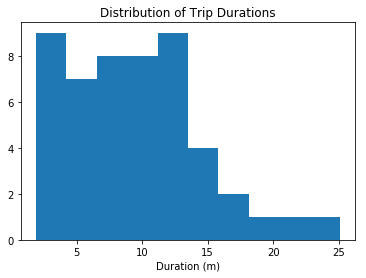

In [14]:
# load library
import matplotlib.pyplot as plt
%matplotlib inline 

# example histogram, data taken from bay area sample
data = [ 7.65,  8.92,  7.42,  5.50, 16.17,  4.20,  8.98,  9.62, 11.48, 14.33,
        19.02, 21.53,  3.90,  7.97,  2.62,  2.67,  3.08, 14.40, 12.90,  7.83,
        25.12,  8.30,  4.93, 12.43, 10.60,  6.17, 10.88,  4.78, 15.15,  3.53,
         9.43, 13.32, 11.72,  9.85,  5.22, 15.10,  3.95,  3.17,  8.78,  1.88,
         4.55, 12.68, 12.38,  9.78,  7.63,  6.45, 17.38, 11.90, 11.52,  8.63,]
plt.hist(data)
plt.title('Distribution of Trip Durations')
plt.xlabel('Duration (m)')
plt.show()

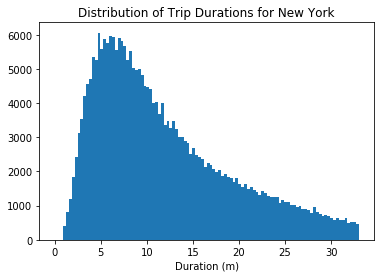

In [15]:
#Selecting New York for this implementation

# load library
import matplotlib.pyplot as plt

#defining function Plot_Graph for reading data from csv and ploting a graph 
def Plot_Graph(city, filename):
    """
    This function reads in source data and plot graph for duration
    """
    with open(filename, 'r') as f_in:
        # set up csv reader object
        reader = csv.DictReader(f_in)
        
        # Initializing variables
        graph_data=[]
        point = 0
        count = 0
        
        #Reading each line of records and appending to list
        for row in reader:
            data_element = row['duration']
            point = round(float(data_element),2)
            graph_data.append(point)

        #With generated data plotting graph
        plt.hist(graph_data,'auto',range=[0,33])
        plt.title('Distribution of Trip Durations for ' + city)
        plt.xlabel('Duration (m)')
        plt.show()

#Sending in New York data file into function and generating graph
data_file = './data/NYC-2016-Summary.csv'
city = "New York"
Plot_Graph(city, data_file)

Use the parameters of the `.hist()` function to plot the distribution of trip times for the Subscribers in your selected city. Do the same thing for only the Customers. Add limits to the plots so that only trips of duration less than 75 minutes are plotted. As a bonus, set the plots up so that bars are in five-minute wide intervals. For each group, where is the peak of each distribution? How would you describe the shape of each distribution?

**Answer**: For Subscribers the peak is between 5 to 8 minutes where as for non-subscribers 16 to 23 minutes.  Subscribers travel more than non-subscribers in less than 10 minutes duration where as non-subscribers travel for average 20 minutes but with less occurrences than subscribers.

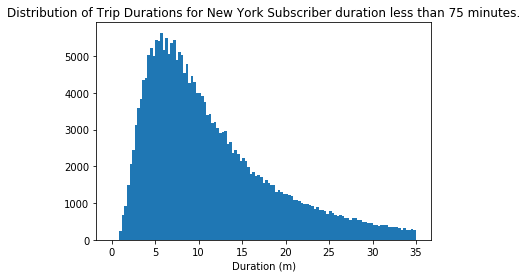

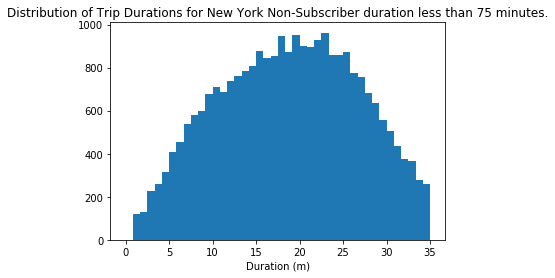

In [16]:
#Selecting New York for this implementation

# load library
import matplotlib.pyplot as plt

#defining function Plot_Graph for reading data from csv and ploting a graph 
def Plot_Graph(city, filename):
    """
    This function reads in source data and plot graph for duration
    """
    with open(filename, 'r') as f_in:
        # set up csv reader object
        reader = csv.DictReader(f_in)
        
        # Initializing variables
        subscriber_data=[]
        nonsubscriber_data=[]
        point = 0
        count = 0
        
        #Reading each line of records and appending to list but this time with duration less than 75 minutes
        for row in reader:
            data_element = row['duration']
            if (row['user_type'] == "Subscriber") and (float(data_element) < 75):
                point = round(float(data_element),2)
                subscriber_data.append(point)
            elif float(data_element) < 75:
                point = round(float(data_element),2)
                nonsubscriber_data.append(point)
                
        #With generated data plotting graph for subscriber data
        plt.hist(subscriber_data,'auto',range=[0,35])
        plt.title('Distribution of Trip Durations for ' + city + " Subscriber duration less than 75 minutes.")
        plt.xlabel('Duration (m)')
        plt.show()
        
        #With generated data plotting graph for subscriber data
        plt.hist(nonsubscriber_data,'auto',range=[0,35])
        plt.title('Distribution of Trip Durations for ' + city + " Non-Subscriber duration less than 75 minutes.")
        plt.xlabel('Duration (m)')
        plt.show()
        

#Sending in New York data file into function and generating graph
data_file = './data/NYC-2016-Summary.csv'
city = "New York"
Plot_Graph(city, data_file)

In [17]:
#Selecting New York for this implementation

# load library
import numpy as np
import matplotlib.pyplot as plt

#defining function Plot_Graph for reading data from csv and ploting a graph 
def Own_Analysis(filename):
    """
    To read source data from csv file and gather Subscriber Count, Non-Subscriber Count and Average duration for each month.
    """
    with open(filename, 'r') as f_in:
        # set up csv reader object
        reader = csv.DictReader(f_in)
        
        # Initializing variables particularly 5 for each month Subcount, NonSub Count, SubDur, NonSub Dur, monthtotal
        JanSub = 0
        JanSubDur = 0
        JanNon = 0
        JanNonDur = 0
        JanCount = 0
        MarSub = 0
        MarSubDur = 0
        MarNon = 0
        MarNonDur = 0
        MarCount = 0
        MaySub = 0
        MaySubDur = 0
        MayNon = 0
        MayNonDur = 0
        MayCount =0
        JulSub = 0
        JulSubDur = 0
        JulNon = 0
        JulNonDur = 0
        JulCount = 0
        SepSub = 0
        SepSubDur = 0
        SepNon = 0
        SepNonDur = 0
        SepCount = 0
        NovSub = 0
        NovSubDur = 0
        NovNon = 0
        NovNonDur = 0
        NovCount = 0
        temp = 0.0
               
        #Reading each line of records and appending to list but this time with duration less than 75 minutes
        for row in reader:
            data_duration = row['duration']
            data_usrtype = row['user_type']
            data_month = row['month']
            
            if data_month=="1":
                if data_usrtype=="Subscriber":
                    JanSub += 1
                    JanSubDur += float(data_duration)
                else:
                    JanNon += 1
                    JanNonDur += float(data_duration)
                JanCount +=1
            elif data_month=="3":
                if data_usrtype=="Subscriber":
                    MarSub += 1
                    MarSubDur += float(data_duration)
                else:
                    MarNon += 1
                    MarNonDur += float(data_duration)
                MarCount +=1  
            elif data_month=="5":
                if data_usrtype=="Subscriber":
                    MaySub += 1
                    MaySubDur += float(data_duration)
                else:
                    MayNon += 1
                    MayNonDur += float(data_duration)
                MayCount +=1                
            elif data_month=="7":
                if data_usrtype=="Subscriber":
                    JulSub += 1
                    JulSubDur += float(data_duration)
                else:
                    JulNon += 1
                    JulNonDur += float(data_duration)
                JulCount +=1                                
            elif data_month=="9":
                if data_usrtype=="Subscriber":
                    SepSub += 1
                    SepSubDur += float(data_duration)
                else:
                    SepNon += 1
                    SepNonDur += float(data_duration)
                SepCount +=1
            elif data_month=="11":
                if data_usrtype=="Subscriber":
                    NovSub += 1
                    NovSubDur += float(data_duration)
                else:
                    NovNon += 1
                    NovNonDur += float(data_duration)
                NovCount +=1                                
        
        #Creating first list with monthwise subscriber count
        Subscriber_Count = [JanSub, MarSub, MaySub, JulSub, SepSub, NovSub]
        
        #Creating second list with monthwise nonsubscriber count
        NonSubscriber_Count = [JanNon, MarNon, MayNon, JulNon, SepNon, NovNon]
        
        #Creating third list with monthwise average duration for Subscriber
        temp = round(JanSubDur/JanCount,2)
        Subscriber_Avg = [temp]
        temp = round(MarSubDur/MarCount,2)
        Subscriber_Avg.append(temp)
        temp = round(MaySubDur/MayCount,2)
        Subscriber_Avg.append(temp)
        temp = round(JulSubDur/JulCount,2)
        Subscriber_Avg.append(temp)
        temp = round(SepSubDur/SepCount,2)
        Subscriber_Avg.append(temp)
        temp = round(NovSubDur/NovCount,2)
        Subscriber_Avg.append(temp) 
        
        #Creating fourth list with monthwise average duration for NonSubscriber
        temp = round(JanNonDur/JanCount,2)
        NonSubscriber_Avg = [temp]
        temp = round(MarNonDur/MarCount,2)
        NonSubscriber_Avg.append(temp)
        temp = round(MayNonDur/MayCount,2)
        NonSubscriber_Avg.append(temp)
        temp = round(JulNonDur/JulCount,2)
        NonSubscriber_Avg.append(temp)
        temp = round(SepNonDur/SepCount,2)
        NonSubscriber_Avg.append(temp)
        temp = round(NovNonDur/NovCount,2)
        NonSubscriber_Avg.append(temp)        
        
        return Subscriber_Count, NonSubscriber_Count, Subscriber_Avg, NonSubscriber_Avg
#        print(Subscriber_Count)
#        print(NonSubscriber_Count)
#        print(Subscriber_Avg)
#        print(NonSubscriber_Avg)

#Sending in New York data file into function and generating graph
#data_file = './data/NYC-2016-Summary.csv'
#city = "New York"
#Graph_Data = Own_Analysis(city, data_file)

for element in city_info.items():
    city = element[0]
    data_file = element[1]
    if city == "NYC":
        NewYork_data = Own_Analysis(data_file)
    elif city == "Chicago":
        Chicago_data = Own_Analysis(data_file)
    elif city == "Washington":
        Washington_data = Own_Analysis(data_file)

<a id='eda_continued'></a>
## Performing Your Own Analysis

Continue the investigation by exploring another question that could be answered by the data available. Document the question you want to explore below. Your investigation should involve at least two variables and should compare at least two groups. You should also use at least one visualization as part of your explorations.

**Answer**: 
What is the ratio between subscriber and non-subscriber for a particular city?
What is the average duration of Subscriber and Non-Subscriber for a particular city?
Compare three city Subscriber data.
Compare three city Non-Subscriber data.
I can possibly generate few more graphs with data I have from Own_Analysis function.

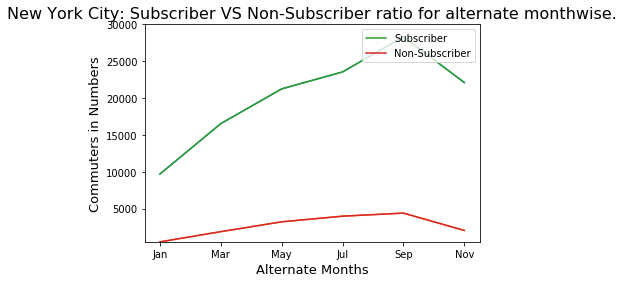

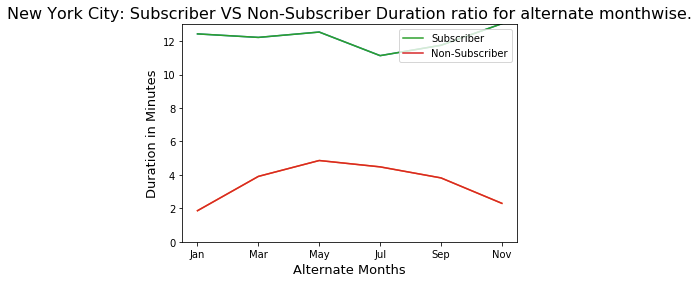

In [18]:

import numpy as np
import matplotlib.pyplot as plt

#Plotting first graph New York City Subscribers VS Non-Subscribers
x=np.array([0,1,2,3,4,5])
xlabel = ["Jan","Mar","May","Jul","Sep","Nov"]

plt.xticks(x, xlabel)
plt.plot(x,NewYork_data[0])
plt.plot(x,NewYork_data[1])
plt.ylim(500, 30000)
plt.title("New York City: Subscriber VS Non-Subscriber ratio for alternate monthwise.",fontsize=16)
plt.xlabel("Alternate Months",fontsize = 13)
plt.ylabel("Commuters in Numbers", fontsize = 13)
Sub, = plt.plot(x,NewYork_data[0], label = 'Subscriber')
Non, = plt.plot(x,NewYork_data[1], label = 'Non-Subscriber')
plt.legend([Sub, Non], ['Subscriber', 'Non-Subscriber'], loc = 1)
plt.show()

#Plotting second graph New York City Subscribers Duration VS Non-Subscribers Duration
plt.xticks(x, xlabel)
plt.plot(x,NewYork_data[2])
plt.plot(x,NewYork_data[3])
plt.ylim(0, 13)
plt.title("New York City: Subscriber VS Non-Subscriber Duration ratio for alternate monthwise.",fontsize=16)
plt.xlabel("Alternate Months",fontsize = 13)
plt.ylabel("Duration in Minutes", fontsize = 13)
Sub, = plt.plot(x,NewYork_data[2], label = 'Subscriber')
Non, = plt.plot(x,NewYork_data[3], label = 'Non-Subscriber')
plt.legend([Sub, Non], ['Subscriber', 'Non-Subscriber'], loc = 1)
plt.show()

[1839, 3154, 5199, 6963, 6346, 4144]
[62, 565, 2012, 3323, 2354, 667]
[9.91, 8.97, 9.13, 9.14, 8.64, 9.56]
[0.68, 3.99, 8.84, 10.52, 8.16, 3.93]


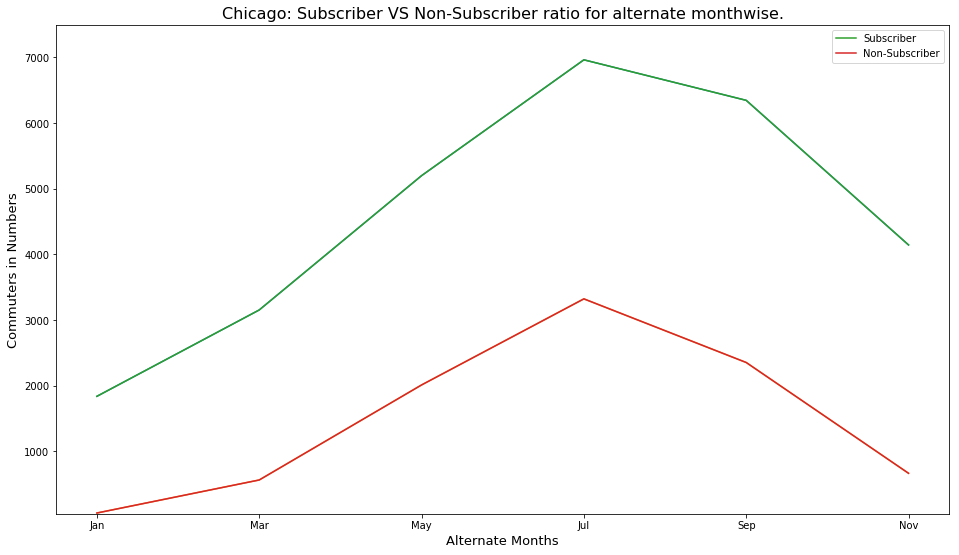

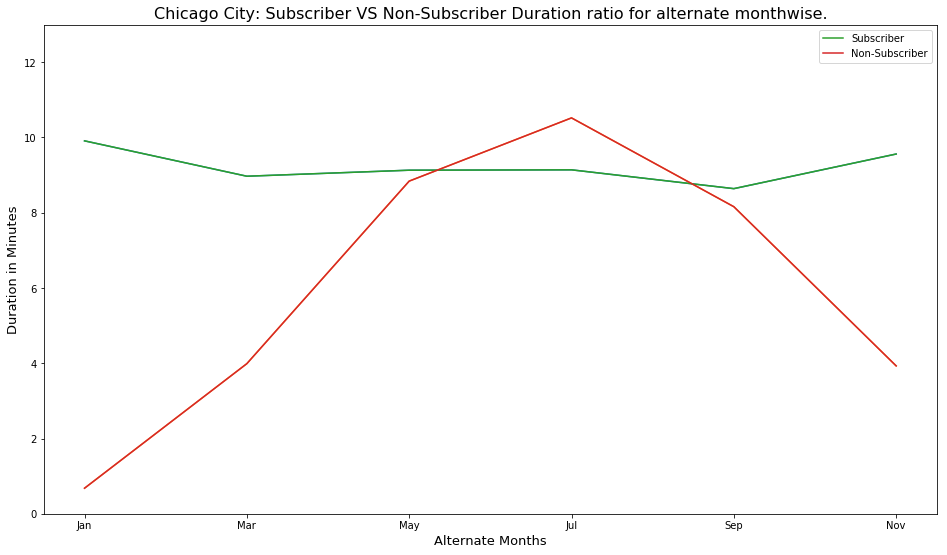

In [92]:
import numpy as np
import matplotlib.pyplot as plt

#Plotting graph for Chicago City Subscribers VS Non-Subscribers
x=np.array([0,1,2,3,4,5])
xlabel = ["Jan","Mar","May","Jul","Sep","Nov"]

print(Chicago_data[0])
print(Chicago_data[1])
print(Chicago_data[2])
print(Chicago_data[3])


plt.xticks(x, xlabel)
plt.plot(x,Chicago_data[0])
plt.plot(x,Chicago_data[1])
plt.ylim(50, 7500)
plt.title("Chicago: Subscriber VS Non-Subscriber ratio for alternate monthwise.",fontsize=16)
plt.xlabel("Alternate Months",fontsize = 13)
plt.ylabel("Commuters in Numbers", fontsize = 13)
Sub, = plt.plot(x,Chicago_data[0], label = 'Subscriber')
Non, = plt.plot(x,Chicago_data[1], label = 'Non-Subscriber')
plt.legend([Sub, Non], ['Subscriber', 'Non-Subscriber'], loc = 1)
plt.show()

#Plotting graph for Chicago City Subscribers Duration VS Non-Subscribers Duration
plt.xticks(x, xlabel)
plt.plot(x,Chicago_data[2])
plt.plot(x,Chicago_data[3])
plt.ylim(0, 13)
plt.title("Chicago City: Subscriber VS Non-Subscriber Duration ratio for alternate monthwise.",fontsize=16)
plt.xlabel("Alternate Months",fontsize = 13)
plt.ylabel("Duration in Minutes", fontsize = 13)
Sub, = plt.plot(x,Chicago_data[2], label = 'Subscriber')
Non, = plt.plot(x,Chicago_data[3], label = 'Non-Subscriber')
plt.legend([Sub, Non], ['Subscriber', 'Non-Subscriber'], loc = 1)
plt.show()

[2212, 4383, 4520, 5155, 5204, 4139]
[222, 1188, 1248, 2186, 1674, 1075]
[9.4, 10.22, 10.54, 9.66, 9.28, 9.05]
[3.39, 9.54, 9.59, 13.24, 9.86, 8.21]


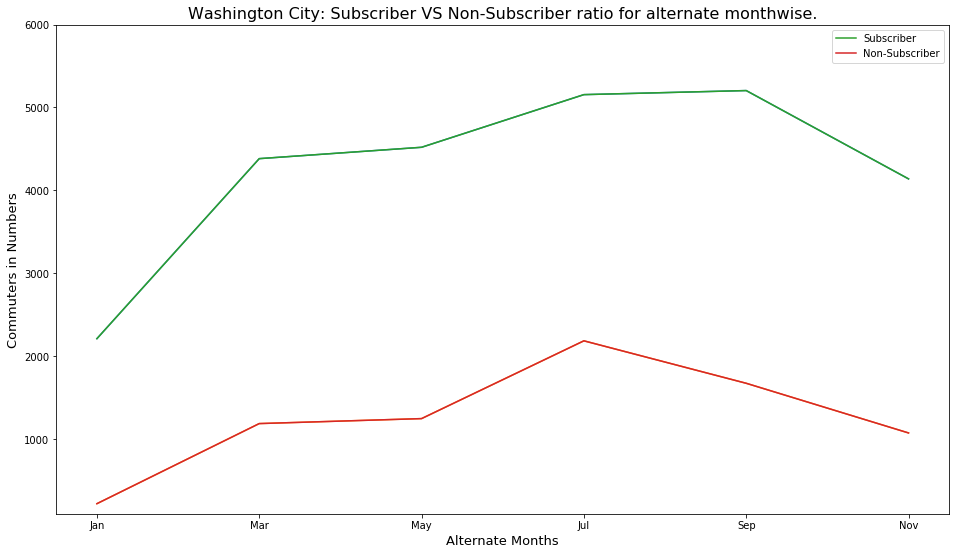

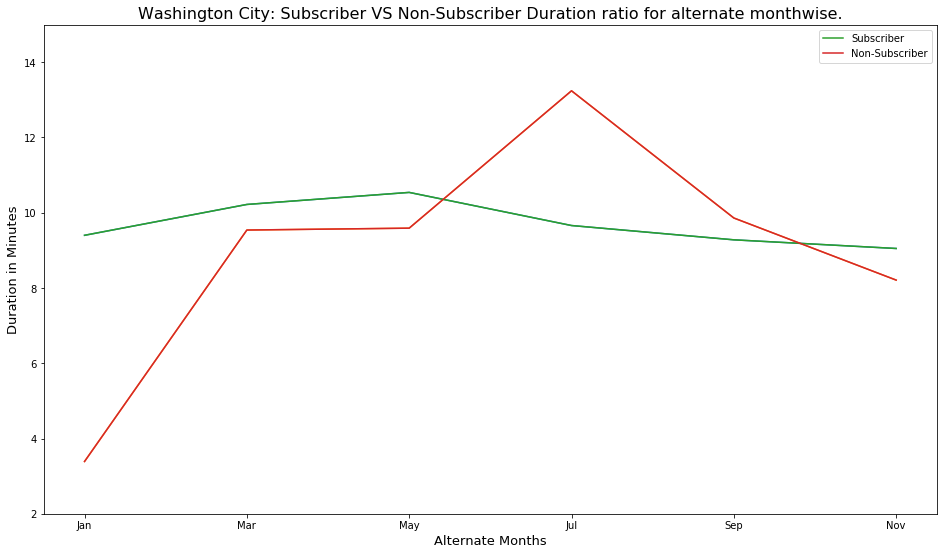

In [93]:
import numpy as np
import matplotlib.pyplot as plt

#Plotting graph for Washington City Subscribers VS Non-Subscribers
x=np.array([0,1,2,3,4,5])
xlabel = ["Jan","Mar","May","Jul","Sep","Nov"]

print(Washington_data[0])
print(Washington_data[1])
print(Washington_data[2])
print(Washington_data[3])


plt.xticks(x, xlabel)
plt.plot(x,Washington_data[0])
plt.plot(x,Washington_data[1])
plt.ylim(100, 6000)
plt.title("Washington City: Subscriber VS Non-Subscriber ratio for alternate monthwise.",fontsize=16)
plt.xlabel("Alternate Months",fontsize = 13)
plt.ylabel("Commuters in Numbers", fontsize = 13)
Sub, = plt.plot(x,Washington_data[0], label = 'Subscriber')
Non, = plt.plot(x,Washington_data[1], label = 'Non-Subscriber')
plt.legend([Sub, Non], ['Subscriber', 'Non-Subscriber'], loc = 1)
plt.show()

#Plotting graph for Washington City Subscribers Duration VS Non-Subscribers Duration
plt.xticks(x, xlabel)
plt.plot(x,Washington_data[2])
plt.plot(x,Washington_data[3])
plt.ylim(2, 15)
plt.title("Washington City: Subscriber VS Non-Subscriber Duration ratio for alternate monthwise.",fontsize=16)
plt.xlabel("Alternate Months",fontsize = 13)
plt.ylabel("Duration in Minutes", fontsize = 13)
Sub, = plt.plot(x,Washington_data[2], label = 'Subscriber')
Non, = plt.plot(x,Washington_data[3], label = 'Non-Subscriber')
plt.legend([Sub, Non], ['Subscriber', 'Non-Subscriber'], loc = 1)
plt.show()

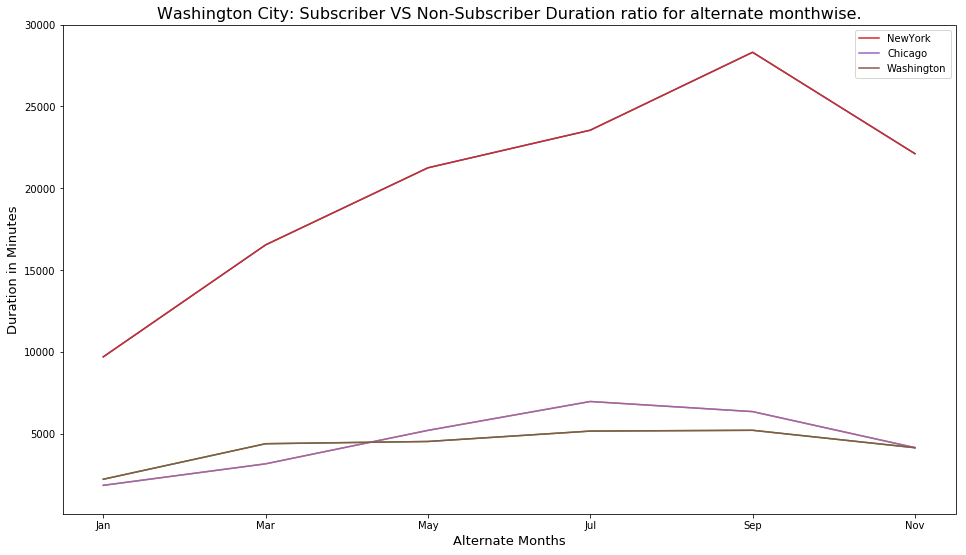

In [103]:
#Plotting graph to compare three city subscriber data
plt.xticks(x, xlabel)
plt.plot(x, NewYork_data[0])
plt.plot(x, Chicago_data[0])
plt.plot(x, Washington_data[0])
plt.ylim(100, 30000)
plt.title("Washington City: Subscriber VS Non-Subscriber Duration ratio for alternate monthwise.",fontsize=16)
plt.xlabel("Alternate Months",fontsize = 13)
plt.ylabel("Duration in Minutes", fontsize = 13)
Nyd, = plt.plot(x,NewYork_data[0], label = 'NewYork')
Chd, = plt.plot(x,Chicago_data[0], label = 'Chicago')
Wnd, = plt.plot(x,Washington_data[0], label = 'Washington')

plt.legend([Nyd, Chd, Wnd], ['NewYork', 'Chicago', 'Washington'])
plt.show()

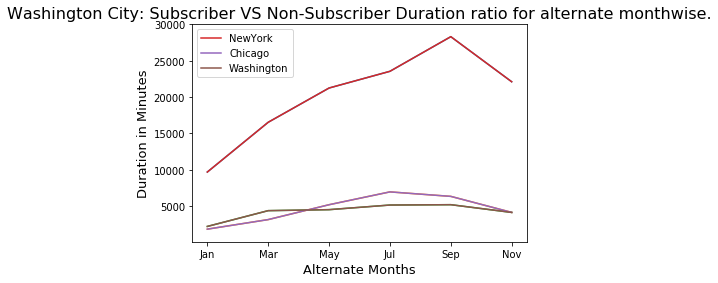

In [19]:
#Plotting graph to compare three city subscriber data
plt.xticks(x, xlabel)
plt.plot(x, NewYork_data[0])
plt.plot(x, Chicago_data[0])
plt.plot(x, Washington_data[0])
plt.ylim(100, 30000)
plt.title("Washington City: Subscriber VS Non-Subscriber Duration ratio for alternate monthwise.",fontsize=16)
plt.xlabel("Alternate Months",fontsize = 13)
plt.ylabel("Duration in Minutes", fontsize = 13)
Nyd, = plt.plot(x,NewYork_data[0], label = 'NewYork')
Chd, = plt.plot(x,Chicago_data[0], label = 'Chicago')
Wnd, = plt.plot(x,Washington_data[0], label = 'Washington')

plt.legend([Nyd, Chd, Wnd], ['NewYork', 'Chicago', 'Washington'])
plt.show()

In [20]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Bike_Share_Analysis.ipynb'])

0